# AirBnb

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("Airbnb_Open_Data.csv")
df

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_86935/207706106.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# EDA

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Drop unnecesary columns

In [58]:
df = df.drop(columns=['license', 'id', 'host name', 'NAME', 'house_rules', 'instant_bookable', 'Construction year', 
                     'calculated host listings count'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host id                 102599 non-null  int64  
 1   host_identity_verified  102310 non-null  object 
 2   neighbourhood group     102570 non-null  object 
 3   neighbourhood           102583 non-null  object 
 4   lat                     102591 non-null  float64
 5   long                    102591 non-null  float64
 6   country                 102067 non-null  object 
 7   country code            102468 non-null  object 
 8   cancellation_policy     102523 non-null  object 
 9   room type               102599 non-null  object 
 10  price                   102352 non-null  object 
 11  service fee             102326 non-null  object 
 12  minimum nights          102190 non-null  float64
 13  number of reviews       102416 non-null  float64
 14  last review         

In [60]:
df.describe()

,host id,lat,long,minimum nights,number of reviews,reviews per month,review rate number,availability 365
count,1.025990e+05,102591.000000,102591.000000,102190.000000,102416.000000,86720.000000,102273.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,8.135845,27.483743,1.374022,3.279106,141.133254
std,2.853900e+10,0.055857,0.049521,30.553781,49.508954,1.746621,1.284657,135.435024
min,1.236005e+08,40.499790,-74.249840,-1223.000000,0.000000,0.010000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2.000000,1.000000,0.220000,2.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,3.000000,7.000000,0.740000,3.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,5.000000,30.000000,2.000000,4.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,5645.000000,1024.000000,90.000000,5.000000,3677.000000


In [61]:
df.columns

Index(['host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'cancellation_policy', 'room type', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number', 'availability 365'],
      dtype='object')

In [62]:
df.shape

(102599, 18)

In [63]:
df.nunique(axis=0)

host id                   102057
host_identity_verified         2
neighbourhood group            7
neighbourhood                224
lat                        21991
long                       17774
country                        1
country code                   1
cancellation_policy            3
room type                      4
price                       1151
service fee                  231
minimum nights               153
number of reviews            476
last review                 2477
reviews per month           1016
review rate number             5
availability 365             438
dtype: int64

# Cleaning data

Missing data

In [65]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,3)

last review               15.490
reviews per month         15.477
country                    0.519
availability 365           0.437
minimum nights             0.399
review rate number         0.318
host_identity_verified     0.282
service fee                0.266
price                      0.241
number of reviews          0.178
country code               0.128
cancellation_policy        0.074
neighbourhood group        0.028
neighbourhood              0.016
lat                        0.008
long                       0.008
host id                    0.000
room type                  0.000
dtype: float64

In [66]:
df['last review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102594           NaN
102595      7/6/2015
102596           NaN
102597    10/11/2015
102598           NaN
Name: last review, Length: 102599, dtype: object

Since "Last review" are dates, and listings without a review will not have a review, we can remove this column and instead focus on reviews per month

In [67]:
df.drop(columns='last review', inplace=True)

In [68]:
df.columns

Index(['host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'cancellation_policy', 'room type', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'reviews per month',
       'review rate number', 'availability 365'],
      dtype='object')

In [69]:
df['reviews per month'] = df['reviews per month'].replace(np.nan, 0)

In [70]:
df['reviews per month']

0         0.21
1         0.38
2         0.00
3         4.64
4         0.10
          ... 
102594    0.00
102595    0.02
102596    0.00
102597    0.10
102598    0.00
Name: reviews per month, Length: 102599, dtype: float64

###  Column: Country

In [71]:
df.shape

(102599, 17)

In [72]:
df.country.unique()

array(['United States', nan], dtype=object)

In [73]:
df.country.isnull().sum()

532

In [75]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

df[["country"]] = imputer.fit_transform(df[["country"]])

df.head()

,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,strict,Private room,$966,$193,10.0,9.0,0.21,4.0,286.0
1,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,moderate,Entire home/apt,$142,$28,30.0,45.0,0.38,4.0,228.0
2,78829239556,NaN,Manhattan,Harlem,40.80902,-73.94190,United States,US,flexible,Private room,$620,$124,3.0,0.0,0.00,5.0,352.0
3,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,moderate,Entire home/apt,$368,$74,30.0,270.0,4.64,4.0,322.0
4,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,moderate,Entire home/apt,$204,$41,10.0,9.0,0.10,3.0,289.0


### Pending missing values

In [76]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)

availability 365          0.44
minimum nights            0.40
review rate number        0.32
host_identity_verified    0.28
service fee               0.27
price                     0.24
number of reviews         0.18
country code              0.13
cancellation_policy       0.07
neighbourhood group       0.03
neighbourhood             0.02
long                      0.01
lat                       0.01
room type                 0.00
country                   0.00
reviews per month         0.00
host id                   0.00
dtype: float64

In [77]:
df.isnull().sum().sort_values(ascending=False)

availability 365          448
minimum nights            409
review rate number        326
host_identity_verified    289
service fee               273
price                     247
number of reviews         183
country code              131
cancellation_policy        76
neighbourhood group        29
neighbourhood              16
long                        8
lat                         8
room type                   0
country                     0
reviews per month           0
host id                     0
dtype: int64

For our analysis, we will use neighbourhood group instead of neighbourhood, so we will drop the neighbourhood feature.
Since country code and country will show the same information, we will also drop the country code feature

In [78]:
df["neighbourhood"].nunique()

224

In [79]:
df = df.drop(columns=['neighbourhood'])

In [80]:
df = df.drop(columns=['country code'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host id                 102599 non-null  int64  
 1   host_identity_verified  102310 non-null  object 
 2   neighbourhood group     102570 non-null  object 
 3   lat                     102591 non-null  float64
 4   long                    102591 non-null  float64
 5   country                 102599 non-null  object 
 6   cancellation_policy     102523 non-null  object 
 7   room type               102599 non-null  object 
 8   price                   102352 non-null  object 
 9   service fee             102326 non-null  object 
 10  minimum nights          102190 non-null  float64
 11  number of reviews       102416 non-null  float64
 12  reviews per month       102599 non-null  float64
 13  review rate number      102273 non-null  float64
 14  availability 365    

### Neighbourhood group: Visualizations

<AxesSubplot:xlabel='neighbourhood group', ylabel='Count'>

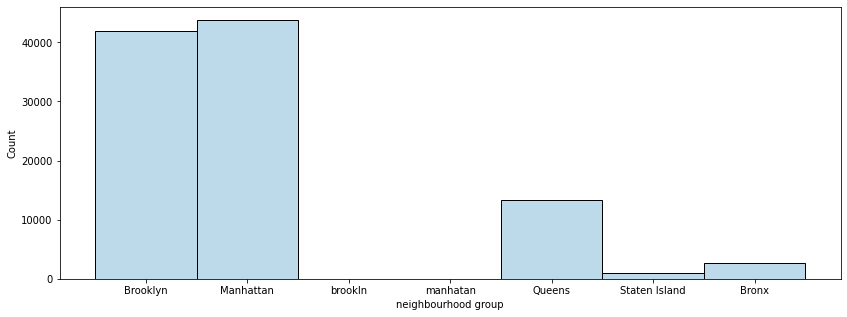

In [84]:
sns.set_palette("Paired")
plt.figure(figsize=(14,5))
sns.histplot(data = df, x="neighbourhood group")

In [85]:
df['neighbourhood group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [86]:
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})

In [87]:
df['neighbourhood group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: neighbourhood group, dtype: int64

<AxesSubplot:title={'center':'Neighbourhood Group'}, xlabel='neighbourhood group', ylabel='Count'>

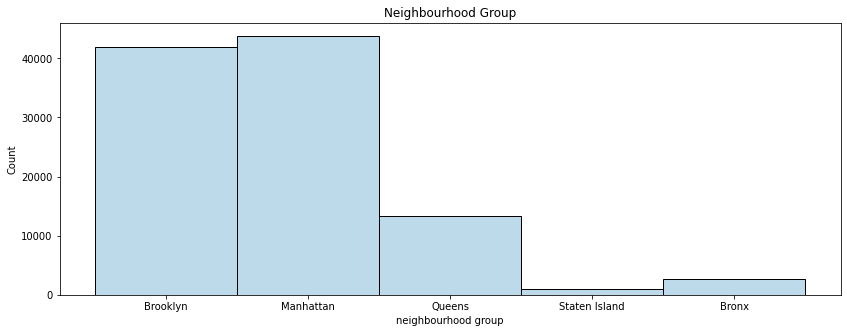

In [89]:
plt.figure(figsize=(14,5))
plt.title("Neighbourhood Group")
sns.histplot(data = df, x="neighbourhood group")

## Change numerical columns to float

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   host_identity_verified          102310 non-null  object 
 2   neighbourhood group             102570 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   country                         102599 non-null  object 
 6   instant_bookable                102494 non-null  object 
 7   cancellation_policy             102523 non-null  object 
 8   room type                       102599 non-null  object 
 9   Construction year               102385 non-null  float64
 10  price                           102352 non-null  object 
 11  service fee                     102326 non-null  object 
 12  minimum nights  

**Change price and service fee from object to float**

In [45]:
df['price'] = df['price'].str.replace("$","")
df['price'] = df['price'].str.replace(',',"")
df['price'] = df['price'].astype(float)
df['price']

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_86935/1281994989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace("$","")


0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [46]:
df['service fee'] = df['service fee'].str.replace("$","")
df['service fee'] = df['service fee'].astype(float)
df['service fee']

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_86935/698127665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace("$","")


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service fee, Length: 102599, dtype: float64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   host_identity_verified          102310 non-null  object 
 2   neighbourhood group             102570 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   country                         102599 non-null  object 
 6   instant_bookable                102494 non-null  object 
 7   cancellation_policy             102523 non-null  object 
 8   room type                       102599 non-null  object 
 9   Construction year               102385 non-null  float64
 10  price                           102352 non-null  float64
 11  service fee                     102326 non-null  float64
 12  minimum nights  

<AxesSubplot:xlabel='price', ylabel='Count'>

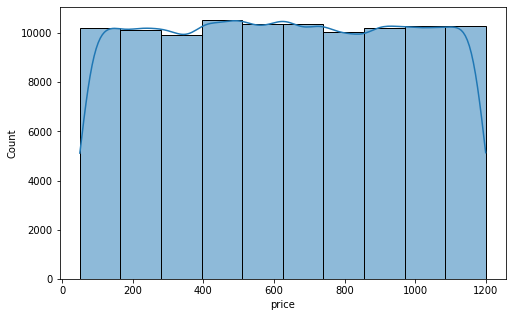

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="price", kde=True, bins=10)

In [49]:
df.price.min()

50.0

<AxesSubplot:xlabel='service fee', ylabel='Count'>

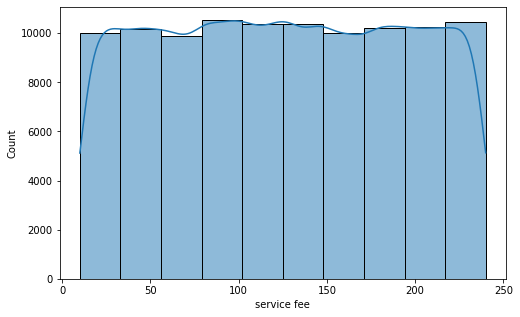

In [50]:
plt.figure(figsize=(8,5))

sns.histplot(data=df, x='service fee', kde=True, bins=10)

### Price per neighbourhood group

<AxesSubplot:xlabel='neighbourhood group', ylabel='price'>

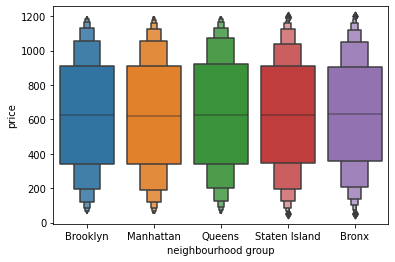

In [51]:
sns.boxenplot(data=df, x='neighbourhood group', y='price')

### Room Type

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room type', ylabel='count'>

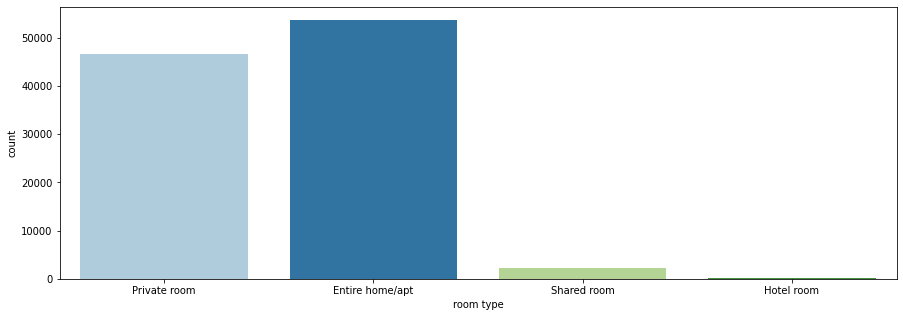

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(df['room type'])

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood group', ylabel='count'>

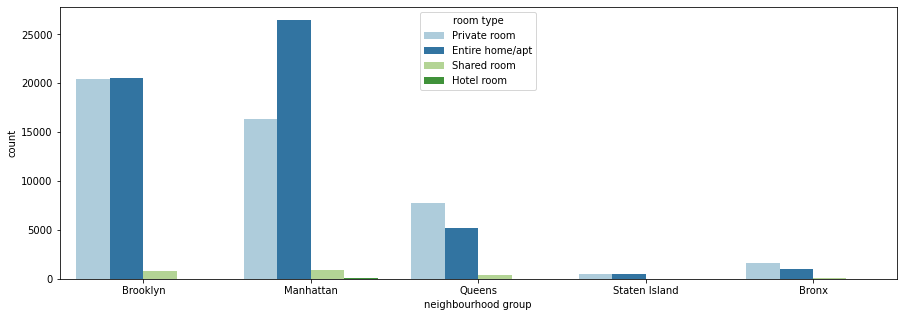

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(df['neighbourhood group'], hue=df['room type'])